<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [116]:
import networkx as nx
from typing import List, Tuple, Set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "out.dbpedia-similar"
G = nx.read_edgelist(path=file, comments="%")

In [3]:
# Custom Function for printing Info about the graph
def graph_info(G: nx.Graph):
    print(f"Number of nodes of the graph: {len(G.nodes())}")
    print(f"Number of edges of the graph: {G.number_of_edges()}")
    deg_cen = dict(nx.degree(G))
    c = pd.DataFrame({"node":deg_cen.keys(), "degree":deg_cen.values()}).set_index("node")
    m = c["degree"].mean()
    print(f"Mean degree of graph: {m}")
    n = nx.number_connected_components(G)
    print(f"number of connected components of this graph: {n}")

In [4]:
# Print info
graph_info(G)

Number of nodes of the graph: 430
Number of edges of the graph: 565
Mean degree of graph: 2.627906976744186
number of connected components of this graph: 95


In [5]:
# Remove self loops
G.remove_edges_from(nx.selfloop_edges(G))

<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [15]:
# A custom function to find the
# set of unconnected pairs
def unconnected_pairs(G: nx.Graph) -> List[Tuple[int,int]]:
    adj = nx.to_numpy_array(G)
    indices = list(zip(*np.where(adj == 0)))
    return [(int(i+1),int(j+1)) for i,j in indices if i<j] # Upper triangular

In [16]:
unc_pairs = unconnected_pairs(G)
# Show 10 pairs that are not connected
for i in range(10):
    print(unc_pairs[i])
print(f"- Number of unconnected pairs: {len(unc_pairs)}")

(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
- Number of unconnected pairs: 91671


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [17]:
def removable_edges(G: nx.Graph) -> List[Tuple[int,int]]:
    G_temp = G.copy()
    removable = []
    for u,v in G.edges:
        G_temp.remove_edge(u,v)
        if nx.number_connected_components(G_temp) == nx.number_connected_components(G):
            removable.append((int(u),int(v)))
        else:
            G_temp.add_edge(u,v)
    return removable

In [18]:
rm_edges = removable_edges(G)
print(f"The number of removable edges are: {len(rm_edges)}")

The number of removable edges are: 229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [19]:
def generate_data(unconnected: List, removable: List) -> pd.DataFrame:
    return pd.DataFrame({'edges': unconnected + removable, 'link': [0] * len(unconnected) + [1] * len(removable)})

In [20]:
# Creating dataframe
df = generate_data(unconnected=unc_pairs, removable=rm_edges)
df

,edges,link
0,"(1, 6)",0
1,"(1, 7)",0
2,"(1, 8)",0
3,"(1, 9)",0
4,"(1, 10)",0
...,...,...
91895,"(401, 403)",1
91896,"(401, 404)",1
91897,"(402, 403)",1
91898,"(402, 404)",1


In [21]:
G_prime = G.copy()
G_prime.remove_edges_from(rm_edges)
print(f"Number of nodes in initial Graph:{len(G.edges)}")
print(f"Number of edges in graph without removale edges:{len(G_prime.edges)}")

Number of nodes in initial Graph:564
Number of edges in graph without removale edges:564


In [22]:
# Inspect G'
graph_info(G_prime)

Number of nodes of the graph: 430
Number of edges of the graph: 564
Mean degree of graph: 2.6232558139534885
number of connected components of this graph: 95


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [109]:
#def JCfunction(threshold_jc):   #uncomment and complete
#return recall_jc, precision_jc, accuracy_jc; #uncomment and complete
from sklearn import metrics


def JCfunction(G: nx.Graph, df: pd.DataFrame, threshold_jc: float):
    k = int('03400146') % 10
    edges = list(map(lambda x: (str(x[0]), str(x[1])), df['edges']))
    p_iter = nx.jaccard_coefficient(G, edges)
    y_pred, ps = [], []
    y_true = list(df['link'])
    pos, neg, highest_ps = [], [], []
    for u, v, p in p_iter:
        if p >= threshold_jc:
            y_pred.append(1)
        else:
            y_pred.append(0)
        ps.append(p)

    accuracy_jc = metrics.accuracy_score(y_true, y_pred)
    precision_jc = metrics.precision_score(y_true, y_pred)
    recall_jc = metrics.recall_score(y_true, y_pred)
    res = sorted(list(zip(edges, ps)), key=lambda x: x[1], reverse=True)

    return recall_jc, precision_jc, accuracy_jc, res[:k]


In [112]:
thresholds = [0.1, 0.15, 0.25, 0.5, 1]
recalls = []
precisions = []
accuracies = []

In [113]:
for thr in thresholds:
    rc, pr, acc, l = JCfunction(G_prime, df, thr)
    recalls.append(rc)
    precisions.append(pr)
    accuracies.append(acc)
    print(f"\n{5*'-'}> Results for threshold {thr}<{5*'-'}")
    print(f"Recall:{rc:.4f}\nPrecision:{pr:.4f}\nAccuracy:{acc:.4f}")
    print("Nodes with highest jaccard coefficient:")
    for (u,v), p in l:
        print(f"Edge: ({u},{v})-->{p}")

-----> Results for threshold 0.1<-----
Recall:0.8734
Precision:0.2024
Accuracy:0.9911
Nodes with highest jaccard coefficient:
Edge: (23,34)-->1.0
Edge: (27,33)-->1.0
Edge: (46,47)-->1.0
Edge: (46,48)-->1.0
Edge: (47,48)-->1.0
Edge: (51,52)-->1.0
-----> Results for threshold 0.15<-----
Recall:0.7860
Precision:0.2219
Accuracy:0.9926
Nodes with highest jaccard coefficient:
Edge: (23,34)-->1.0
Edge: (27,33)-->1.0
Edge: (46,47)-->1.0
Edge: (46,48)-->1.0
Edge: (47,48)-->1.0
Edge: (51,52)-->1.0
-----> Results for threshold 0.25<-----
Recall:0.7118
Precision:0.2436
Accuracy:0.9938
Nodes with highest jaccard coefficient:
Edge: (23,34)-->1.0
Edge: (27,33)-->1.0
Edge: (46,47)-->1.0
Edge: (46,48)-->1.0
Edge: (47,48)-->1.0
Edge: (51,52)-->1.0
-----> Results for threshold 0.5<-----
Recall:0.5852
Precision:0.3153
Accuracy:0.9958
Nodes with highest jaccard coefficient:
Edge: (23,34)-->1.0
Edge: (27,33)-->1.0
Edge: (46,47)-->1.0
Edge: (46,48)-->1.0
Edge: (47,48)-->1.0
Edge: (51,52)-->1.0
-----> Results

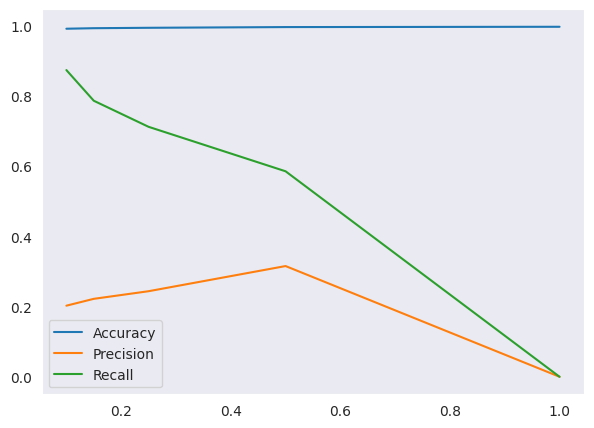

In [123]:
sns.set_style("dark")
fig,ax = plt.subplots(figsize = (7,5))
ax.plot(thresholds, accuracies, label = 'Accuracy')
ax.plot(thresholds, precisions, label = 'Precision')
ax.plot(thresholds, recalls, label = 'Recall')
plt.legend()
plt.show()


<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

In [ ]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)

In [ ]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient

#Preferential Attachment

#Resource Allocation

<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [ ]:
#uncomment whole cell
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV
 
#X =             #features, uncomment and complete
#y = ...['link'] #target, uncomment and complete

#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0) #uncomment and complete

In [ ]:
#uncomment whole cell
#classifier = RandomForestClassifier()   

#from sklearn.preprocessing import MinMaxScaler 
#mm_scaler = MinMaxScaler() 
#X_train_scaled = mm_scaler.fit_transform(X_train)
#X_test_scaled = mm_scaler.transform(X_test)

#parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
#model = GridSearchCV(classifier, param_grid = parameters) 

In [ ]:
#model.fit(X_train_scaled, )#train the model, uncomment and complete

In [ ]:
#predictions = model.predict(X_test_scaled)       #uncomment
#predictions[ ] #get (A.M. last digit) first predictions, uncomment and complete

In [ ]:
#predict_proba = model.predict_proba(...) #uncomment and complete

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [ ]:
#install node2vec with conda / pip
#from node2vec import Node2Vec   #uncomment
#import multiprocessing          #uncomment

#generate walks
#node2vec_walker = Node2Vec(, , , , , , ) #uncomment and complete

#train node2vec model
#n2v_model = node2vec_walker.fit(window= , min_count=1) #uncomment and complete

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [ ]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
#x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0)  #uncomment and complete

In [ ]:
#uncomment whole cell
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#classifier = RandomForestClassifier(max_depth=2, random_state=0) 
#classifier.fit()   #uncomment and complete

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>